🔧 First: Load and Inspect the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
from scipy import stats
import tensorflow as tf

# Load the CSV
df = pd.read_csv("financial_loan.csv")

# Basic Info
print(df.shape)
print(df.dtypes)
df.head()


(38576, 24)
id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


🧼 Data Cleaning & Preprocessing

In [ ]:
# Check for nulls
print(df.isnull().sum())

# Drop columns with too many nulls or fill missing values
df = df.dropna(thresh=len(df)*0.5, axis=1)  # drop cols >50% missing
df.fillna(method='ffill', inplace=True)

# Convert date columns (if any)
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Example: extract month/year if issue_date exists
if 'issue_date' in df.columns:
    df['month'] = df['issue_date'].dt.month
    df['year'] = df['issue_date'].dt.year


id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64


/tmp/ipython-input-7-2249637538.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-7-2249637538.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-7-2249637538.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-7-2249637538.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


📊 Basic EDA & Univariate Analysis

                 id                     issue_date  \
count  3.857600e+04                          38572   
mean   6.810371e+05  2021-10-17 03:52:10.353624320   
min    5.473400e+04            2021-01-01 00:00:00   
25%    5.135170e+05            2021-10-05 00:00:00   
50%    6.627280e+05            2021-11-02 00:00:00   
75%    8.365060e+05            2021-11-08 00:00:00   
max    1.077501e+06            2021-12-12 00:00:00   
std    2.113246e+05                            NaN   

               last_credit_pull_date              last_payment_date  \
count                          38576                          38576   
mean   2021-06-08 13:36:34.193280512  2021-06-26 09:52:08.909166080   
min              2021-01-08 00:00:00            2021-01-08 00:00:00   
25%              2021-04-15 00:00:00            2021-03-16 00:00:00   
50%              2021-05-16 00:00:00            2021-06-14 00:00:00   
75%              2021-08-13 00:00:00            2021-09-15 00:00:00   
max             

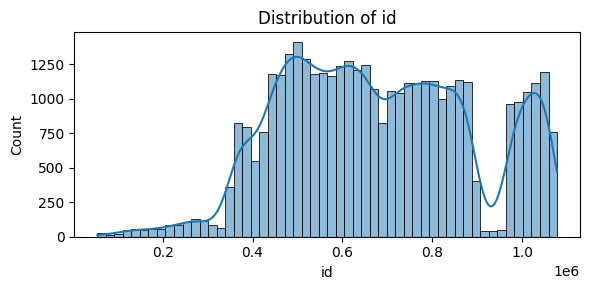

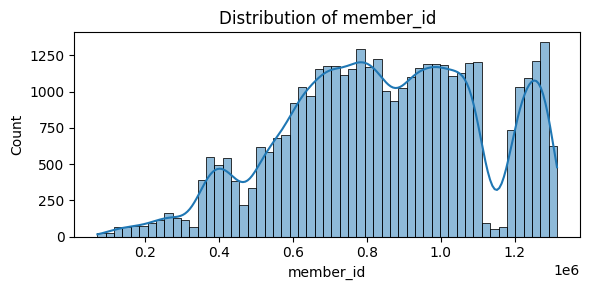

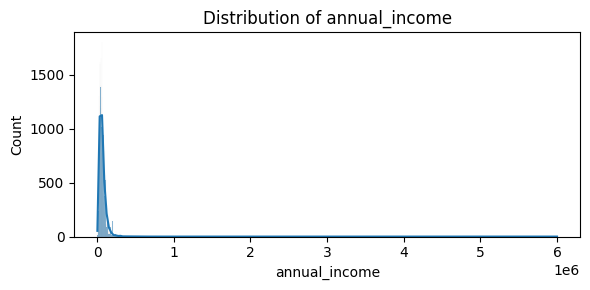

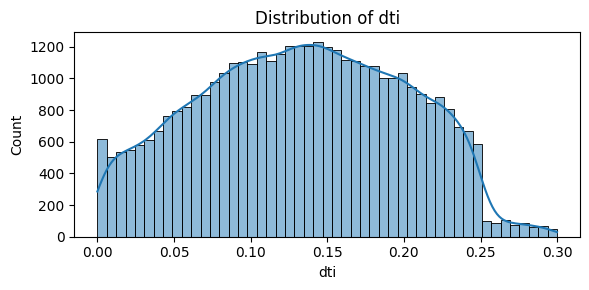

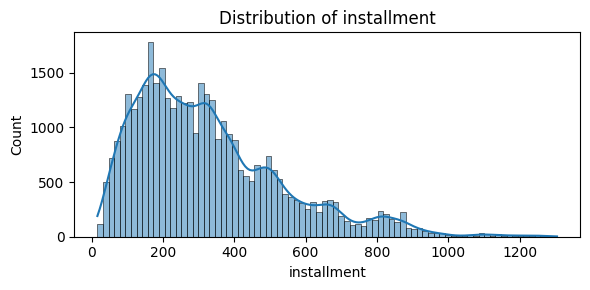

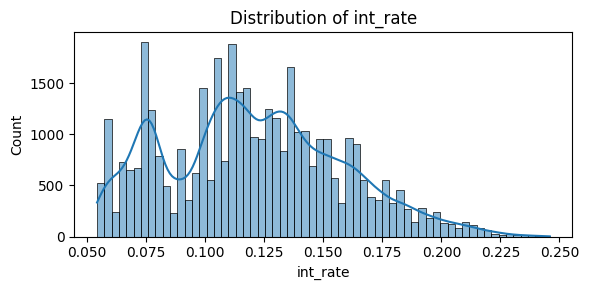

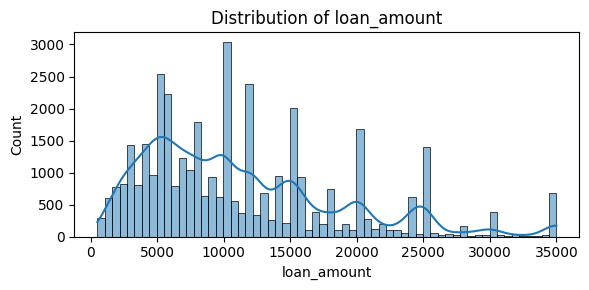

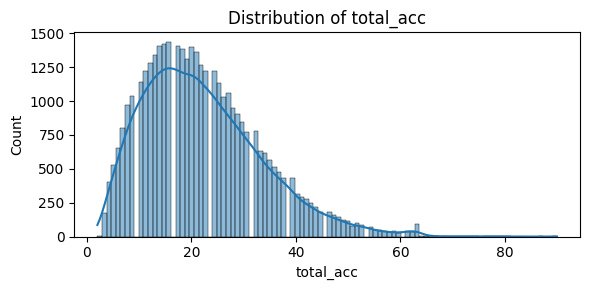

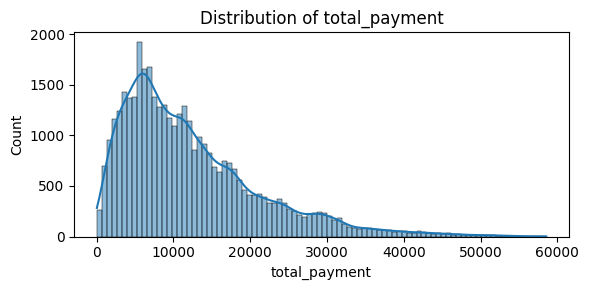

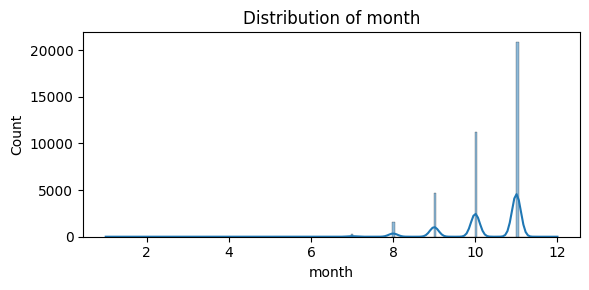

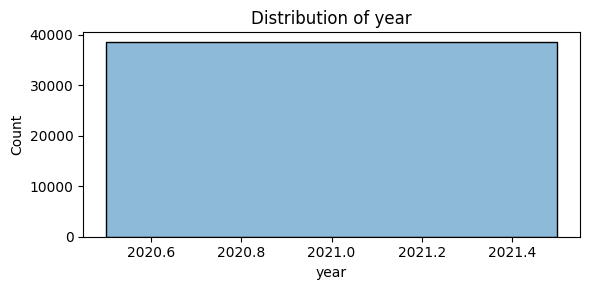

In [ ]:
# Summary stats
print(df.describe())

# Categorical value counts
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())

# Plot numeric distributions
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


📈 Bivariate Analysis

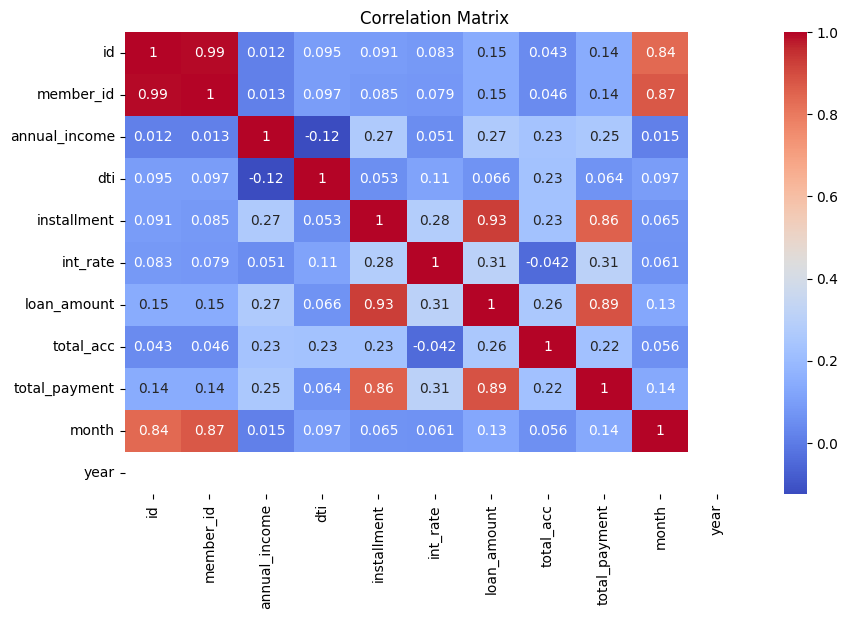

/tmp/ipython-input-9-2261181185.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='Set2')


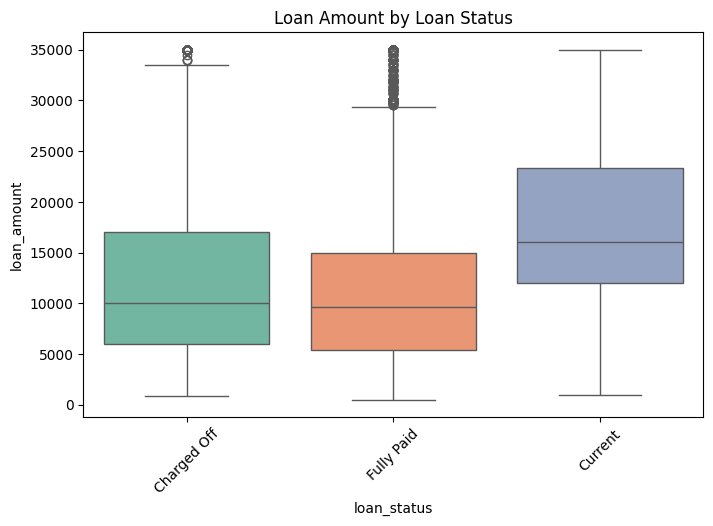

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplot of loan amount vs status (if exists)
if 'loan_status' in df.columns and 'loan_amount' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='loan_status', y='loan_amount', palette='Set2')
    plt.title("Loan Amount by Loan Status")
    plt.xticks(rotation=45)
    plt.show()


📊 Interactive Visualizations with Plotly & Bokeh

In [ ]:
# Plotly Scatter (Annual Income vs Loan Amount)
if 'annual_income' in df.columns and 'loan_amount' in df.columns:
    fig = px.scatter(df, x='annual_income', y='loan_amount', color='loan_status',
                     title='Annual Income vs Loan Amount')
    fig.show()

# Bokeh Bar Plot
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import output_notebook
output_notebook()

# Example: loan_status counts
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
status_counts = df['loan_status'].value_counts().reset_index()
status_counts.columns = ['loan_status', 'count']
source = ColumnDataSource(status_counts)

p = figure(x_range=status_counts['loan_status'], height=350, title="Loan Status Count")
p.vbar(x='loan_status', top='count', width=0.8, source=source, legend_field="loan_status",
       line_color='white', fill_color=factor_cmap('loan_status', palette='Spectral6', factors=status_counts['loan_status']))
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)


📊 Statistical Insights with SciPy

In [ ]:
# T-test: interest rate for approved vs rejected loans
if 'loan_status' in df.columns and 'int_rate' in df.columns:
    approved = df[df['loan_status'] == 'Approved']['int_rate']
    rejected = df[df['loan_status'] == 'Rejected']['int_rate']
    t_stat, p_value = stats.ttest_ind(approved, rejected, nan_policy='omit')
    print(f"T-test: t={t_stat:.2f}, p={p_value:.4f}")


T-test: t=nan, p=nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



🤖 (Optional) Basic Modeling with TensorFlow

In [ ]:
# Simple classification model: predict loan_status
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target
df = df.dropna(subset=['loan_status'])
le = LabelEncoder()
df['loan_status_enc'] = le.fit_transform(df['loan_status'])

# Features
features = ['annual_income', 'loan_amount', 'int_rate', 'dti']  # adjust as per your columns
X = df[features]
y = df['loan_status_enc']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# TensorFlow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0323 - loss: -88.6198 - val_accuracy: 0.0298 - val_loss: -1481.7332
Epoch 2/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0294 - loss: -3151.9475 - val_accuracy: 0.0298 - val_loss: -10741.2939
Epoch 3/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0291 - loss: -15244.7568 - val_accuracy: 0.0298 - val_loss: -31653.5898
Epoch 4/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0283 - loss: -39261.7656 - val_accuracy: 0.0298 - val_loss: -65920.0312
Epoch 5/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0287 - loss: -77468.8203 - val_accuracy: 0.0298 - val_loss: -114919.0703
Epoch 6/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0278 - loss: -132641.9219 - val_accuracy: 0.0298 - val_loss: -180095.2344
Epoch 7/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0275 - loss: -203777.8281 - val_accuracy: 0.0298 - val_loss: -263183.8750
Epoch 8/20
965/965 ━━━━━━━━━━━━━━━━━━━━ 3s 3m